In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [9]:
file_path = "./DataSheet 235-395 (5) new3.xlsx"  
df = pd.read_excel(file_path, sheet_name="Sheet2")


df = df.fillna(0)

df

,Alloy,Zn(wt%),Al(wt%),Zr(wt%),Li(wt%),Ca(wt%),Y(wt%),Grain Size,Heat Treatment,Hardness (HV),...,error(±).2,%Elongation,error(±).3,Icorr (μA/cm^2),Ecorr (V),CR (mm/y),mg/(d-cm2),mm/day,Solution,Polarisation Resistance
0,ZK60,6.00,0.0,0.45,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.088,0.000,0.0,0.0,0.0,0.0,0.0
1,ZK60,6.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,AZ91,0.60,9.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.300,-1.430,0.0,0.8,0.0,0.0,0.0
3,AZ91,0.60,9.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.000,3.2,0.0,0.0,0.0,0.0
4,Mg/1Ca,0.00,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.820,-1.650,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Mg-0.82Y-1.84Zn,1.84,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.469,-1.570,0.0,0.0,0.0,0.0,0.0
302,Mg-1.54Y-1.73Zn,1.73,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.827,-1.528,0.0,0.0,0.0,0.0,0.0
303,Mg-7Y-0.2Zn,0.20,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,227.000,-1.649,0.0,0.0,0.0,0.0,0.0
304,Mg-1.5Y-1.2Zn-0.44Zr,1.20,0.0,0.00,0.0,0.0,1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,122.000,-1.776,0.0,0.0,0.0,0.0,0.0


In [16]:
input_features = ['Zn(wt%)', 'Al(wt%)', 'Zr(wt%)', 'Li(wt%)', 'Ca(wt%)', 'Y(wt%)', 'Grain Size', '%Elongation']
output_features = ['Hardness  (HV) ', 'UTS  (MPa) ', 'YS  (MPa) ', 'Elastic modulus  (GPa) ',
                   'Icorr (μA/cm^2)', 'Ecorr (V)', 'CR (mm/y) ', 'Polarisation Resistance']

In [17]:
X = df[input_features]
y = df[output_features]


In [18]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)


In [20]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree: MSE={mean_squared_error(y_test, y_pred_dt):.2f}, MAE={mean_absolute_error(y_test, y_pred_dt):.2f}, R²={r2_score(y_test, y_pred_dt):.2f}")

Decision Tree: MSE=0.02, MAE=0.05, R²=0.07


In [21]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest: MSE={mean_squared_error(y_test, y_pred_rf):.2f}, MAE={mean_absolute_error(y_test, y_pred_rf):.2f}, R²={r2_score(y_test, y_pred_rf):.2f}")

Random Forest: MSE=0.02, MAE=0.05, R²=0.36


In [22]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost: MSE={mean_squared_error(y_test, y_pred_xgb):.2f}, MAE={mean_absolute_error(y_test, y_pred_xgb):.2f}, R²={r2_score(y_test, y_pred_xgb):.2f}")


XGBoost: MSE=0.02, MAE=0.05, R²=0.20


In [24]:
selected_features = ['Hardness  (HV) ', 'UTS  (MPa) ', 'YS  (MPa) ']
selected_indices = [output_features.index(feature) for feature in selected_features]


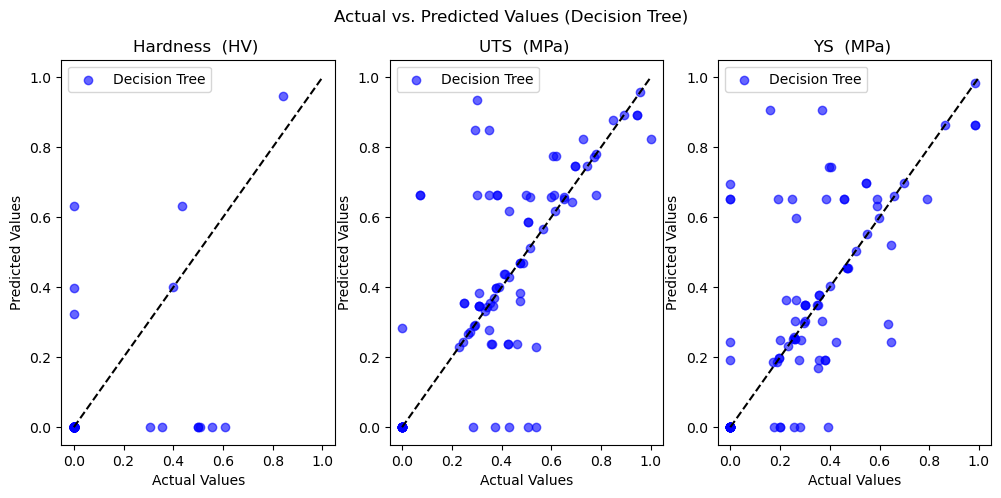

In [25]:
#  Decision Tree
plt.figure(figsize=(12, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[:, selected_indices[i]], y_pred_dt[:, selected_indices[i]], label="Decision Tree", alpha=0.6, color='blue')
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(feature)
    plt.legend()

plt.suptitle("Actual vs. Predicted Values (Decision Tree)")
plt.show()

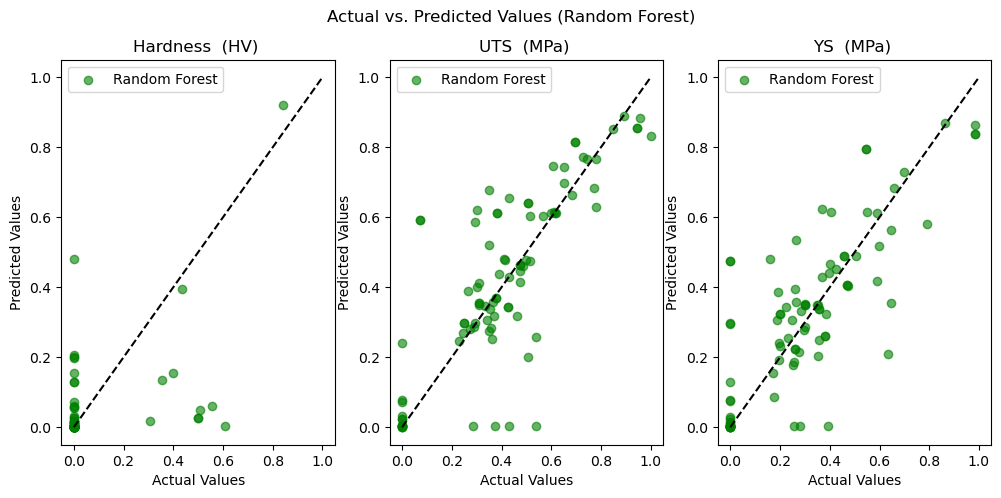

In [26]:
# Random Forest
plt.figure(figsize=(12, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[:, selected_indices[i]], y_pred_rf[:, selected_indices[i]], label="Random Forest", alpha=0.6, color='green')
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(feature)
    plt.legend()

plt.suptitle("Actual vs. Predicted Values (Random Forest)")
plt.show()

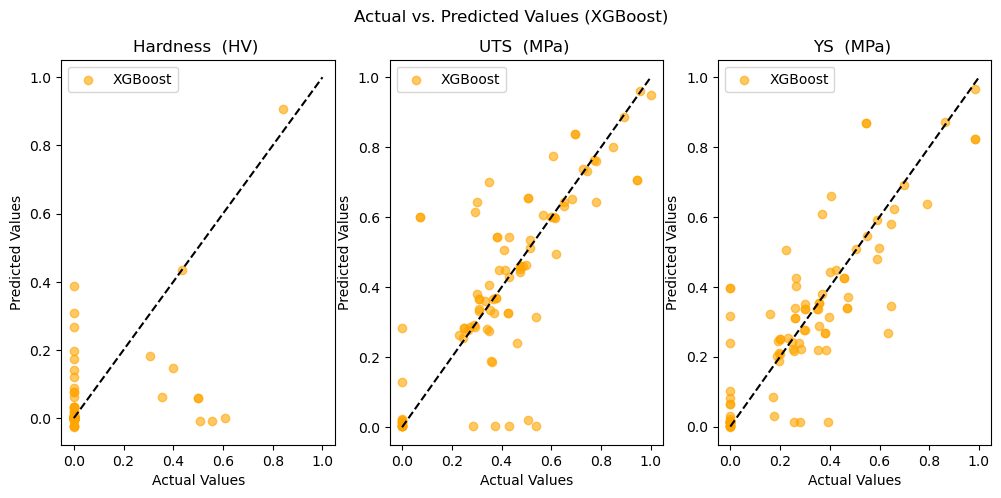

In [27]:
# XGBoost
plt.figure(figsize=(12, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[:, selected_indices[i]], y_pred_xgb[:, selected_indices[i]], label="XGBoost", alpha=0.6, color='orange')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(feature)
    plt.legend()

plt.suptitle("Actual vs. Predicted Values (XGBoost)")
plt.show()